# Application of Fuzzy logic and Genetic Algorithm in Stock Trading

This notebook explores the application of genetic algorithms in optimizing the fuzzy rules as applied in technical analysis of stocks.

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import math
import pandas as pd
import matplotlib.pyplot as plt
from Gene import Gene
from Genome import Genome
from Population import Population
from Crossover import single_point, two_point, uniform, linear, SBX, crossover
from Fitness import evaluate_fitness, test_fitness, sortino_fitness, sharpe_fitness, num_trades_fitness, max_drawdown_fitness, multi_obj_fitnes
from Selection import roulette_wheel, RWS, SUS, tournament, rank
from Base_genome import base_genome
from Seed_genome import seed_genome
from helper_module import split_train_test_sets, split_train_set
import Evolution

                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


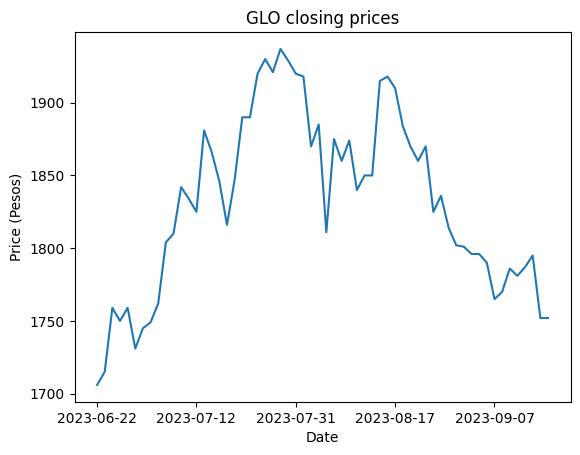

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].tail(60))
ax.set_xticks(ax.get_xticks()[::13])
plt.show()

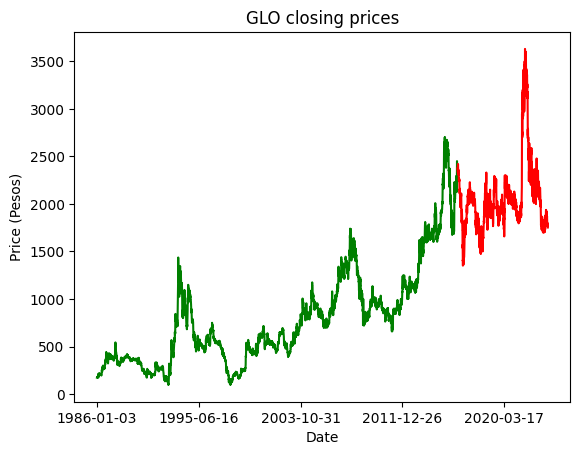

In [3]:
# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(train['Close'], 'g')
ax.plot(test['Close'], 'r')
ax.set_xticks(ax.get_xticks()[::2000])
plt.show()

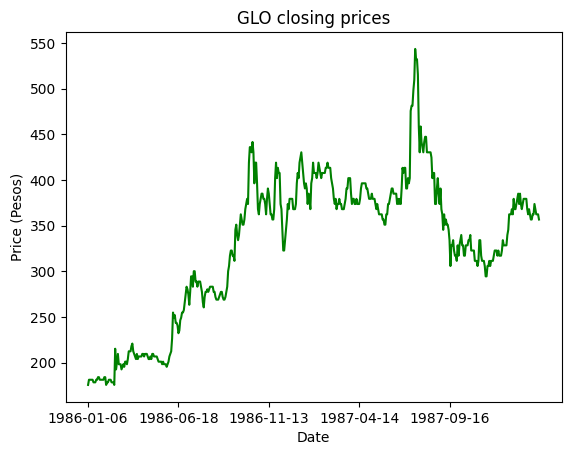

In [4]:
# split the train set into multiple batches
train_set = split_train_set(train)

# plot a sample of the train set
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(train_set[1]['Close'], 'g')
ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [5]:
# # genome1 = Genome(SEED_GENOME)
# genome1 = Genome(BASE_GENOME)
# genome1.initialize_genome()
# # stock, num_trades, bnh_returns, strat_returns, strat_sharpe_ratio, strat_sortino_ratio, max_drawdown= evaluate_fitness(train_set[2500], genome1)
# fitness = evaluate_fitness(train_set[2500], genome1)
# # print(returns)
# # print(num_trades)
# # print(bnh_returns)
# # print(strat_returns)
# # print(strat_sharpe_ratio)
# print(fitness)
# # print(max_drawdown)

In [6]:
NUM_SEED_GENOMES = 25
NUM_BASE_GENOMES = 75
SEED_GENOME = Genome(seed_genome())
BASE_GENOME = Genome(base_genome())
population = Population()
population.seed_population(seed_genome = SEED_GENOME, num_seeds = NUM_SEED_GENOMES)
population.add_and_initialize_to_population(base_genome = BASE_GENOME, num_genomes = NUM_BASE_GENOMES)

In [7]:
if __name__ == "__main__":
    population = Evolution.run_evolution(population = population,
                                         train_set = train_set,
                                         fitness_func = evaluate_fitness,
                                         num_generations = 50)

24308894.64804096
328948.0347950526
104.5676169260246
3.81041239737703
64180.20432721398
18.387149256147474
120.05853083391355
8.636910943380467
13.540645352666244
38.702639208564136
15.37759596103088
407.1360369801647
57.11088424423451
110.35688197131768
158.35012130910673
31.45196409948045
135.6266415944919
8.69760594620216
6.24892282905409
4.911977029433146
9.757174355793147
202.78722954984923
82.34027755180523
209.23473951147446
35.256622567035585
22428868.571355887
598.3063996330694
194.82477558176714
60.5797665570979
74.17629073588522
20.7474549994347
12.159507479567937
9.841053987326356
11.533432337479653
34.00179958758038
172.28330725071683
21.44728484825171
5.158045846341205
16.83397619562042
8.89569326718347
4101.834002655978
8.148906036420229
10.103528257827538
1551.9584780814791
42.21116712796048
127.21614632137774
104.39286489794235
6.442452970495289
163.97400132182216
40.69850610660511


In [8]:
print(population)

Population 101 has 100 genome/s
It has the following gene/s:
GENE_ID: 2503
Gene name: RSI_window
Value: 186

Gene name: RSI_p1
Value: 0.8983399286217797

Gene name: RSI_p2
Value: 0.1269906922011525

Gene name: RSI_p3
Value: -0.9601104301856005

Gene name: RSI_p4
Value: 0.11200630248286436

Gene name: RSI_low_membership
Value: [75.00814651014608, 96.06030754412953]

Gene name: RSI_middle_membership
Value: [13.83780372360123, 59.65037033010327, 88.95863474358319]

Gene name: RSI_high_membership
Value: [81, 88]

Gene name: entry_condition
Value: [4.126931879142147, 15.351898104237463]

Gene name: stop_loss
Value: 0.5147205407914088

Gene name: z_rolling_window
Value: 285

GENE_ID: 2588
Gene name: RSI_window
Value: 187

Gene name: RSI_p1
Value: 0.9695392334276971

Gene name: RSI_p2
Value: 0.12318009968913249

Gene name: RSI_p3
Value: 0.17534094078458914

Gene name: RSI_p4
Value: 0.1619463704470687

Gene name: RSI_low_membership
Value: [76, 99]

Gene name: RSI_middle_membership
Value: [15.9

In [9]:
a = [1,2,3]
b = ['a', 'b', 'c']

for i, j in zip(a, b):
    print(i, j)


1 a
2 b
3 c


In [10]:
series_JFC = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/JFC.csv', header = 0, index_col = 'Date')
series_CEB = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/CEB.csv', header = 0, index_col = 'Date')
series_GTCAP = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GTCAP.csv', header = 0, index_col = 'Date')
series_AEV = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/AEV.csv', header = 0, index_col = 'Date')
series_BPI = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/BPI.csv', header = 0, index_col = 'Date')

GENE_ID: 2588
Gene name: RSI_window
Value: 187

Gene name: RSI_p1
Value: 0.9695392334276971

Gene name: RSI_p2
Value: 0.12318009968913249

Gene name: RSI_p3
Value: 0.17534094078458914

Gene name: RSI_p4
Value: 0.1619463704470687

Gene name: RSI_low_membership
Value: [76, 99]

Gene name: RSI_middle_membership
Value: [15.903184633527136, 60.57621513147367, 88.06550583661014]

Gene name: RSI_high_membership
Value: [72.62068055176346, 77.72409057613828]

Gene name: entry_condition
Value: [2.997192256764806, 14.411349629094024]

Gene name: stop_loss
Value: 0.5147205407914089

Gene name: z_rolling_window
Value: 282




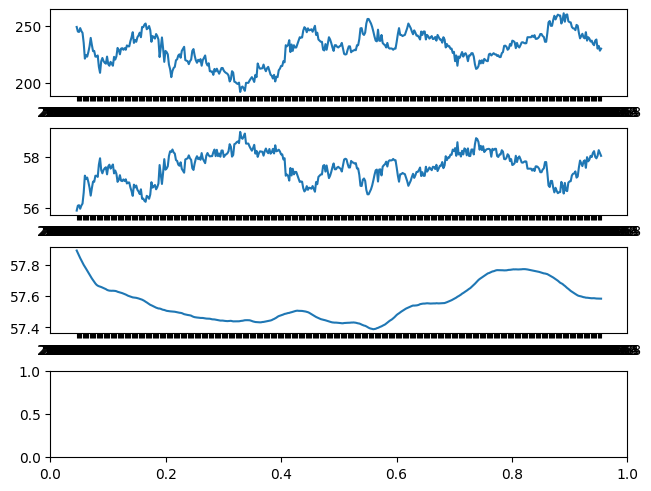

311.6414122120938

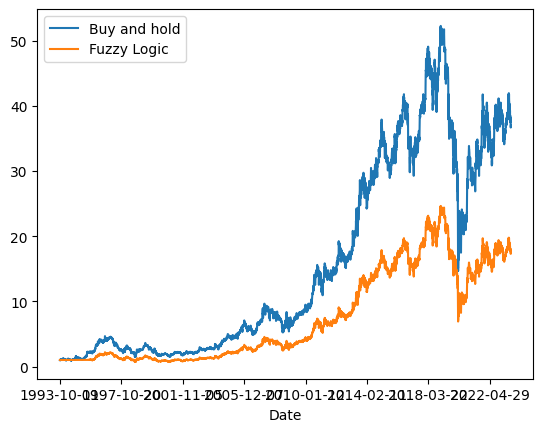

In [17]:
print(population.population[2])
test_fitness(genome = population.population[2], series = series_JFC)
# test_fitness(genome = Genome(SEED_GENOME), series = test)

In [12]:
def main() -> None:
    """
    This function runs all the other functions as provided in the above
    """
    pass
    # use multiprocessing here

In [13]:
# TODO: improve this notebook by using NSGA III in future implementations.
# TODO: visualize the fitness of the generation through PCA
# TODO: refactor SBX crossover; refactor the whole crossover module
# TODO: set-up a distance metric in preserving the diversity in a population
# TODO: do elitist selection